# DEEPAR

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/preprocessed/dataset_ln.csv',index_col='DATE')
df.index = pd.DatetimeIndex(df.index,freq='MS')

dataset = PandasDataset(df, target="SALES")

In [ ]:
training_data, test_gen = split(dataset, 
                                offset=-36)

test_data = test_gen.generate_instances(prediction_length=12, 
                                        windows=3)

# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, 
    freq="M", 
    trainer_kwargs={"max_epochs": 5}
)

model.train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | Mode  | In sizes                                                   | Out sizes   
--------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | train | [[1, 1], [1, 1], [1, 48, 2], [1, 48], [1, 48], [1, 12, 2]] | [1, 100, 12]
--------------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Epoch 0: |          | 50/? [00:01<00:00, 29.68it/s, v_num=1, train_loss=2.630]

Epoch 0, global step 50: 'train_loss' reached 2.63365 (best 2.63365), saving model to 'c:\\Users\\gerar\\OneDrive\\Desktop\\alcoholSalesProject\\notebooks\\lightning_logs\\version_1\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [00:01<00:00, 31.05it/s, v_num=1, train_loss=0.539]

Epoch 1, global step 100: 'train_loss' reached 0.53906 (best 0.53906), saving model to 'c:\\Users\\gerar\\OneDrive\\Desktop\\alcoholSalesProject\\notebooks\\lightning_logs\\version_1\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [00:01<00:00, 30.57it/s, v_num=1, train_loss=-0.309]

Epoch 2, global step 150: 'train_loss' reached -0.30851 (best -0.30851), saving model to 'c:\\Users\\gerar\\OneDrive\\Desktop\\alcoholSalesProject\\notebooks\\lightning_logs\\version_1\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [00:01<00:00, 30.17it/s, v_num=1, train_loss=-0.392]

Epoch 3, global step 200: 'train_loss' reached -0.39240 (best -0.39240), saving model to 'c:\\Users\\gerar\\OneDrive\\Desktop\\alcoholSalesProject\\notebooks\\lightning_logs\\version_1\\checkpoints\\epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [00:01<00:00, 32.29it/s, v_num=1, train_loss=-0.663]

Epoch 4, global step 250: 'train_loss' reached -0.66311 (best -0.66311), saving model to 'c:\\Users\\gerar\\OneDrive\\Desktop\\alcoholSalesProject\\notebooks\\lightning_logs\\version_1\\checkpoints\\epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: |          | 50/? [00:01<00:00, 32.05it/s, v_num=1, train_loss=-0.663]


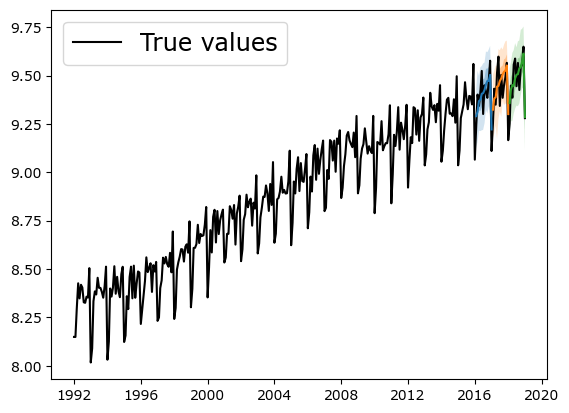

In [10]:
forecasts = list(model.predict(test_data.input))

# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()